Customer churn is the loss of clients or customers. In order to avoid losing customers, a company needs to examine why its customers have left in the past and which features are more important to determine who will churn in the future. Our task is therefore to predict whether customers are about to churn and which are the most important features to get that prediction right. As in most prediction problems, we will use machine learning.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
#Load Data From Local File
data=pd.read_csv("telco (1).csv",sep=';')

## Data Understanding

In [47]:
#See the first 5 data
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,monthlycharges,totalcharges,churn,region_France,region_Germany,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,1,0,0,1,1,0,0,0,0,...,12.00,12.00,0,1,0,1,0,0,1,0
1,0,0,1,1,1,1,0,0,0,0,...,13.00,13.00,0,1,0,0,1,0,1,0
2,1,0,1,1,1,1,0,0,0,0,...,18.80,18.80,0,0,1,0,1,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,18.85,18.85,0,0,1,0,1,0,1,0
4,1,0,0,0,1,1,0,0,0,0,...,18.85,18.85,1,0,1,0,1,0,0,1


In [4]:
#See the number of rows and number of columns of data
data.shape

(7043, 21)

In [5]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
#See a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.401107,64.751874
std,0.368612,24.606849,30.097858
min,0.000000,1.000000,12.000000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,120.000000,118.750000


The dataset includes information about:
+ Customers who churned — the column is called Churn
+ Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information — how long they’ve been a customer, the type of contract (month-to-month, one-year, two-years), payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers — gender, age, and if they have partners and dependents

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [7]:
#Drop duplicate value
data=data.drop_duplicates()

In [8]:
#See changes in the number of rows and columns after the duplicate value is deleted
data.shape

(7043, 21)

### Check Data Types

In [9]:
#Check Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
#merubah nilai kosong dengan isi spasi menjadi NA
data["totalcharges"]=data["totalcharges"].replace(" ",np.nan)

In [11]:
#merubah tipe data
data["totalcharges"]=data["totalcharges"].astype("float64")

In [12]:
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Check Missing Value

In [13]:
#Check the missing value
data.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

### Impute Missing value

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


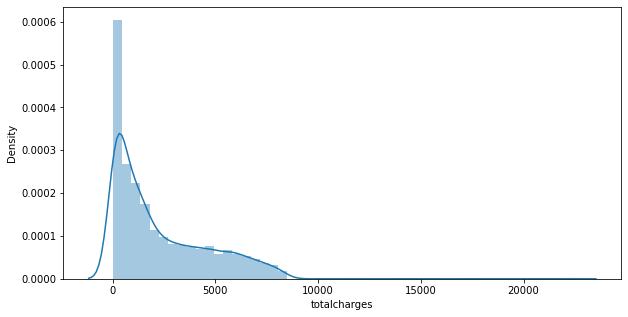

In [14]:
#Look at the distribution of the totalcharges variable with histogram and density plot
plt.figure(figsize=(10,5))
sns.distplot(data["totalcharges"])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


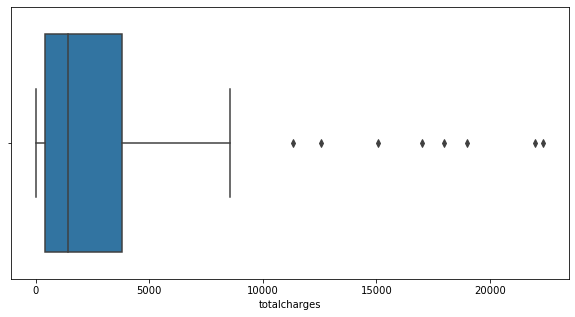

In [15]:
#Look at the distribution of the totalcharges variable with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

In [16]:
#Because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill=data["totalcharges"].median()
data["totalcharges"]=data["totalcharges"].fillna(fill)

In [17]:
#Check missing value after imputation
data.isnull().sum()

customerid          0
region              0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Outlier Detection

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


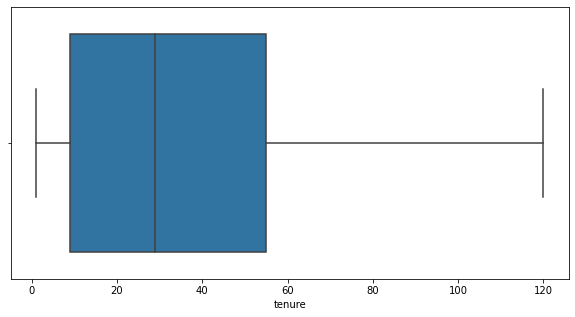

In [18]:
#Check Outlier on the Tenure variable
plt.figure(figsize=(10,5))
sns.boxplot(data["tenure"])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


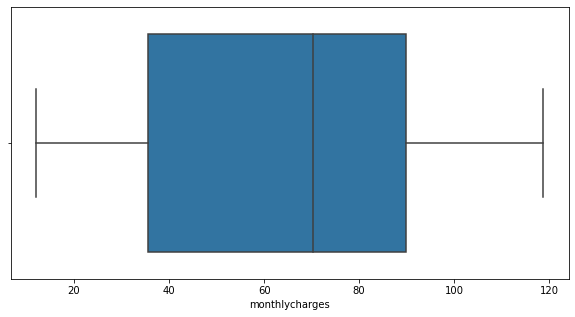

In [19]:
#Check Outlier on the monthlycharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["monthlycharges"])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


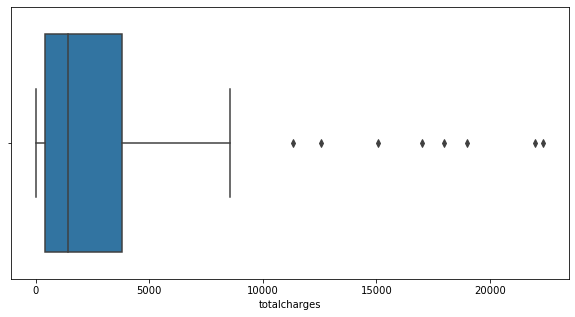

In [20]:
#Check Outlier on the totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

In [21]:
#See observation outliers on the totalcharges variable
Q1=data["totalcharges"].quantile(0.25)
Q3=data["totalcharges"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["totalcharges"]>upper_range),:]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [22]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"]>upper_range),"totalcharges"]=upper_range

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


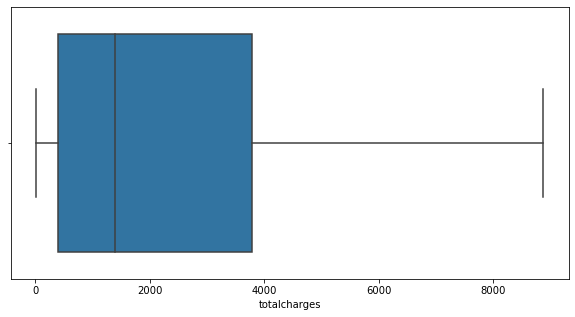

In [23]:
#Check Outlier on the totalcharges variable
plt.figure(figsize=(10,5))
sns.boxplot(data["totalcharges"])
plt.show()

### Handle Inconsistent Data

In [24]:
#Replace "No Internet Service" with "No"
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols1 :
    data[i]  = data[i].replace({'No internet service' : 'No'})

#Replace "No Phone Service" with "No"
data['multiplelines']  = data['multiplelines'].replace({'No phone service' : 'No'})

### Encoding Variables

In [25]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['customerid']
num_cols   = ['tenure', 'monthlycharges', 'totalcharges']

#Biner category columns
bin_cols   = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','onlinesecurity','churn',
              'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','paperlessbilling']

#multi category columns
multi_cols = ['region', 'internetservice', 'paymentmethod']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi category columns
data=pd.get_dummies(data = data,columns = multi_cols,drop_first=True)

In [26]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,...,monthlycharges,totalcharges,churn,region_France,region_Germany,internetservice_Fiber optic,internetservice_No,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,2424-WVHPL,1,1,0,0,1,1,0,0,0,...,12.00,12.000,0,1,0,1,0,0,1,0
1,3679-XASPY,0,0,1,1,1,1,0,0,0,...,13.00,13.000,0,1,0,0,1,0,1,0
2,2967-MXRAV,1,0,1,1,1,1,0,0,0,...,18.80,18.800,0,0,1,0,1,0,0,1
3,8992-CEUEN,0,0,0,0,1,1,0,0,0,...,18.85,18.850,0,0,1,0,1,0,1,0
4,9318-NKNFC,1,0,0,0,1,1,0,0,0,...,18.85,18.850,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4472-LVYGI,0,0,1,1,2,0,0,1,0,...,52.55,1397.475,0,0,1,0,0,0,0,0
7039,1371-DWPAZ,0,0,1,1,2,0,0,1,1,...,56.05,1397.475,0,0,1,0,0,1,0,0
7040,2775-SEFEE,1,0,0,1,3,1,1,1,1,...,61.90,1397.475,0,0,1,0,0,0,0,0
7041,4075-WKNIU,0,0,1,1,3,1,1,0,1,...,73.35,1397.475,0,0,1,0,0,0,0,1


## Data Partition

In [27]:
data=data.drop(labels="customerid",axis=1)

In [28]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='churn',axis=1)
train_Y = train['churn']
test_X  = test.drop(labels='churn',axis=1)
test_Y  = test['churn']

## SMOTE (Synthetic Minority Oversampling Technique)

In [29]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [30]:
#Proportion before smote
train_Y.value_counts()

0    4136
1    1498
Name: churn, dtype: int64

In [31]:
#Proportion after smote
train_smote_Y.value_counts()

churn
0        4136
1        4136
dtype: int64

In [32]:
## Modeling

## Regresi Logistik

In [33]:
import statsmodels.api as sm 
exog = sm.add_constant(train_smote_X)
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.359594
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8248
Method:                           MLE   Df Model:                           23
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.4812
Time:                        16:07:14   Log-Likelihood:                -2974.6
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.1302      

In [34]:
exog = sm.add_constant(train_smote_X.drop(labels="seniorcitizen",axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.359602
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8249
Method:                           MLE   Df Model:                           22
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.4812
Time:                        16:07:14   Log-Likelihood:                -2974.6
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -6.1471      

#### Evaluation

In [35]:
pred=log_reg.predict(sm.add_constant(test_X.drop(labels="seniorcitizen",axis=1)))

In [36]:
pred

6842    0.549316
3576    0.283510
1206    0.432652
5037    0.327221
5131    0.075715
          ...   
6009    0.139677
1168    0.900953
619     0.848209
2001    0.148178
4104    0.133575
Length: 1409, dtype: float64

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,np.round(pred)))

Accuracy for Logreg on test data:  0.7714691270404542


In [38]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, np.round(pred))
CF

array([[857, 181],
       [141, 230]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, np.round(pred), target_names=target_names))

              precision    recall  f1-score   support

          No       0.86      0.83      0.84      1038
         Yes       0.56      0.62      0.59       371

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



## KNN

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X[num_cols]=ss.fit_transform(train_smote_X[num_cols])
test_X[num_cols]=ss.transform(test_X[num_cols])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [2,3,4,5,6],
    'metric': ['euclidean','manhatan']
}

In [42]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 2) # cv yang biasa digunakan adalah 5 atau 10
CV_knnc.fit(train_smote_X, train_smote_Y)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [2, 3, 4, 5, 6]})

In [49]:
CV_knnc.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

#### Evaluation

In [43]:
pred=CV_knnc.predict(test_X)

In [44]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred))

Accuracy for KNN on CV data:  0.7260468417317246


In [45]:
CF=confusion_matrix(test_Y, pred)
CF

array([[801, 237],
       [149, 222]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.84      0.77      0.81      1038
         Yes       0.48      0.60      0.53       371

    accuracy                           0.73      1409
   macro avg       0.66      0.69      0.67      1409
weighted avg       0.75      0.73      0.73      1409

